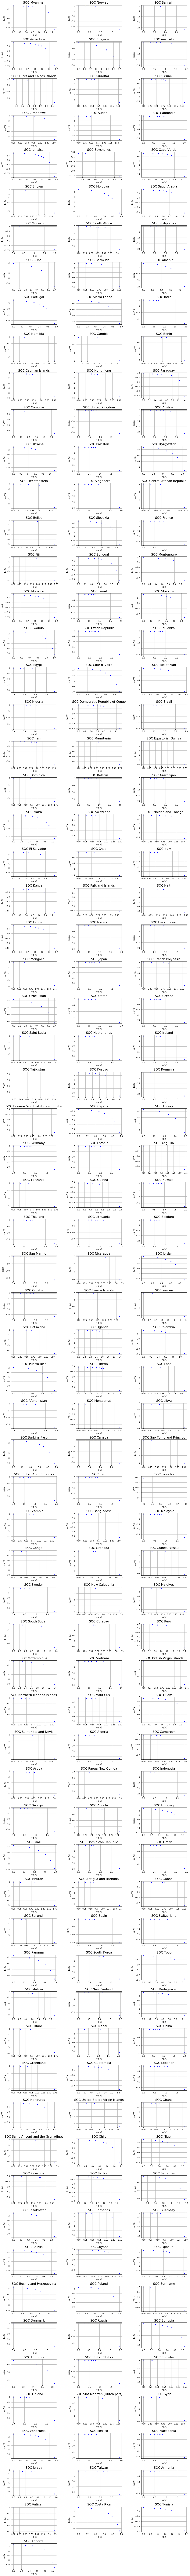

In [2]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


def colname(n,name):
    """
    Retorna uma lista com as strings dos valores de N e sinal atuais
    """

    col = []
    for i in range(n):
        col.append(name+'_'+str(i))
        
    return col  


def SOC(data, n_bins=50): 
    n = len(data)
    mean = np.mean(data)
    var = np.var(data)
    std = np.std(data)
    #print("mean: ", mean, " var: ", var)
    """ Computa a Taxa Local de Flutuação para cada valor da ST """ 
    Gamma = []
    
    for i in range(0,n): #Gamma.append((data[i] - mean)/var) 
        Gamma.append((data[i] - mean)/std)
    
        """ Computa P[Psi_i] """
        # Retorna o número de elementos em cada bin, bem como os delimitare
    counts, bins = np.histogram(Gamma, n_bins) 
    Prob_Gamma = []
    for i in range(0, n_bins):
        Prob_Gamma.append(counts[i]/n) #plt.plot(Gamma)
    
    return Prob_Gamma, counts



##################Modulo 2############################
txt_files = glob('owd/*.txt')

plt.figure(figsize=(14,280))
plot_counter = 1

for file in txt_files:
    plt.subplot(int(np.ceil(len(txt_files)/2)),3,plot_counter)

    name = file.split('.')[0].split('/')[1]
    data = np.genfromtxt(file,delimiter=' ',dtype='float32',filling_values=0)

    try:
        Prob_Gamma, counts = SOC(data)
    except ValueError:
        pass

    x = np.linspace(1, len(counts), len(counts))

    log_Prob = np.log10(Prob_Gamma)
    log_counts = np.log10(np.nonzero(counts))

    p = np.array(Prob_Gamma)
    p = p[np.nonzero(p)]
    c = counts[np.nonzero(counts)] 
    log_p = np.log10(p)
    log_c = np.log10(c)

    a = (log_p[np.argmax(c)] - log_p[np.argmin(c)]) / (np.max(c) - np.min(c))
    b = log_Prob[0]
    y = b * np.power(10, (a*counts))

    """ Plotagem """
    plt.scatter(np.log10(counts), y, marker=".", color="blue")

    plt.title('SOC '+name, fontsize = 16) 
    plt.xlabel('log(ni)') 
    plt.ylabel('log(Yi)')
    plt.grid()
    
    plot_counter = plot_counter + 1

plt.tight_layout()
plt.show()